In [2]:
import os
import sys
from pathlib import Path
sys.path.insert(0, os.path.abspath('.'))
sys.path.insert(1, os.path.abspath('C:\\Users\\David Palecek\\Documents\\Python_projects\\optac\\optac\\src\\optac\\'))
sys.path.insert(1, os.path.abspath('C:\\Users\\David Palecek\\Documents\\Python_projects\\optan\\optan'))

os.chdir('C:\\Users\\David Palecek\\Documents\\Python_projects\\optan')
from optan.src import optan

init optan
init optan


In [3]:
exp = optan.Optan()
exp.set_file_format('jpg')
exp.load_folder("C:\\Users\\David Palecek\\Documents\\UAlg\\my_opt\Data\\230112-16-39-29")

missing metadata



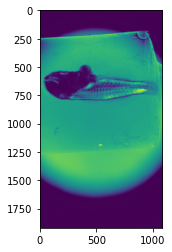

(128, 1920, 1080)


In [4]:
exp.show_image_raw(index=(0, 0, 0))
exp.average_raw_data()
print(exp.data.shape)

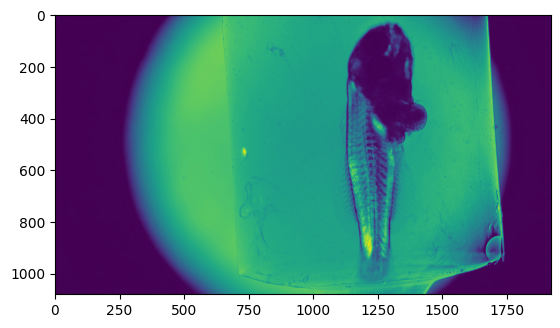

(128, 1080, 1920)


In [7]:
exp.rotate_frames_90('anticlock')
exp.show_image_data(0)
print(exp.data.shape)

In [8]:
exp.calc_sinogram()

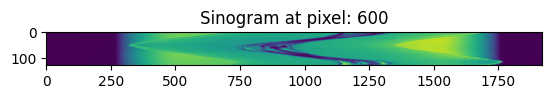

In [9]:
exp.show_image_sino(idx=600)

In [10]:
exp.iradon(index=600)

AttributeError: 'Optan' object has no attribute 'iradon'

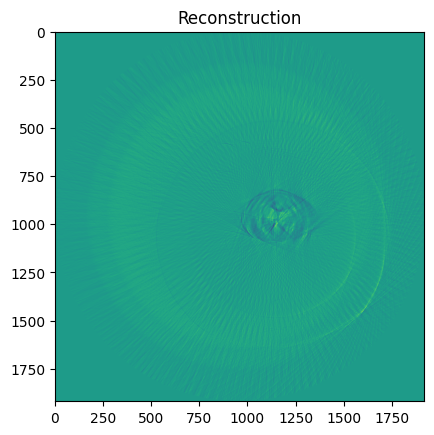

In [8]:
exp.show_image_radon()

In [11]:
from tomopy.recon.rotation import find_center
import tomopy as tom
import numpy as np

In [12]:
# tomopy works with radians
theta = exp.theta/360*(2*np.pi)

TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

In [11]:
center = find_center(exp.data, theta, 600)

In [16]:
center = tom.find_center_vo(exp.data, 600)

In [17]:
center

1016.0

In [61]:
r = tom.recon(exp.data[:65,595:605,:], theta[:65], center=center, algorithm='fbp')

In [62]:
r.shape

(10, 1920, 1920)

In [63]:
import matplotlib.pyplot as plt

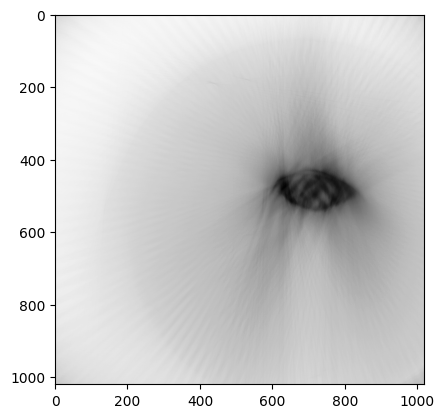

In [64]:
cut = 450
plt.imshow(r[5, cut:-cut, cut:-cut], cmap=plt.cm.Greys_r)